In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob

## Detect the road signs and classify them into one of the four categories (prohibitory, mandatory,danger or other).

Class id labels:

0 = speed limit 20 (prohibitory)

1 = speed limit 30 (prohibitory)

2 = speed limit 50 (prohibitory)

3 = speed limit 60 (prohibitory)

4 = speed limit 70 (prohibitory)

5 = speed limit 80 (prohibitory)

6 = restriction ends 80 (other)

7 = speed limit 100 (prohibitory)

8 = speed limit 120 (prohibitory)

9 = no overtaking (prohibitory)

10 = no overtaking (trucks) (prohibitory)

11 = priority at next intersection (danger)

12 = priority road (other)

13 = give way (other)

14 = stop (other)

15 = no traffic both ways (prohibitory)

16 = no trucks (prohibitory)

17 = no entry (other)

18 = danger (danger)

19 = bend left (danger)

20 = bend right (danger)

21 = bend (danger)

22 = uneven road (danger)

23 = slippery road (danger)

24 = road narrows (danger)

25 = construction (danger)

26 = traffic signal (danger)

27 = pedestrian crossing (danger)

28 = school crossing (danger)

29 = cycles crossing (danger)

30 = snow (danger)

31 = animals (danger)

32 = restriction ends (other)

33 = go right (mandatory)

34 = go left (mandatory)

35 = go straight (mandatory)

36 = go right or straight (mandatory)

37 = go left or straight (mandatory)

38 = keep right (mandatory)

39 = keep left (mandatory)

40 = roundabout (mandatory)

41 = restriction ends (overtaking) (other)

42 = restriction ends (overtaking (trucks)) (other)

### Reading the data

In [15]:
path="full_path/maindata"
df= pd.read_csv(os.path.join(path,'gt.txt'),names=['ImageID','XMin','YMin','XMax','YMax','ClassID'],sep=';')

### basic information about gt files content
1=image name,
(2-3)=(left-top) ROI,
(4-5)=(right-bottom) ROI,
id=in which class sign belongs

In [10]:
df.head()

,ImageID,XMin,YMin,XMax,YMax,ClassID
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


## Exploratory Data Analysis

### 1.display sample image from dataset

In [16]:
img=cv.imread("full_path/maindata/00001.ppm")

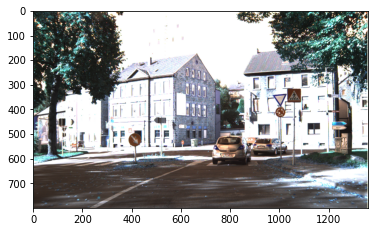

In [17]:
#cv.imshow("img",img)
plt.imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

In [18]:
print(img.shape)

(800, 1360, 3)


In [20]:
# Checking shape of every image
array=[]
p="full_p/maindata"
for i in range(len(df)):
    img = cv.imread(os.path.join(p,df['ImageID'][i]))
    array.append(img.shape)

In [21]:
# Every image is of same size
imgsize=set(array)
print(imgsize)

{(800, 1360, 3)}


In [31]:
# finding count of each id
x=df['ClassID'].value_counts()
x

38    88
12    85
13    83
2     81
10    80
1     79
4     68
8     57
5     53
7     41
9     41
11    38
18    38
14    32
25    31
3     30
17    29
35    20
23    20
6     19
26    18
33    16
30    16
15    15
28    14
22    13
34    12
42    11
40    10
20     9
36     9
32     8
16     8
41     7
39     6
21     5
29     5
24     5
0      4
27     3
31     2
37     2
19     2
Name: ClassID, dtype: int64

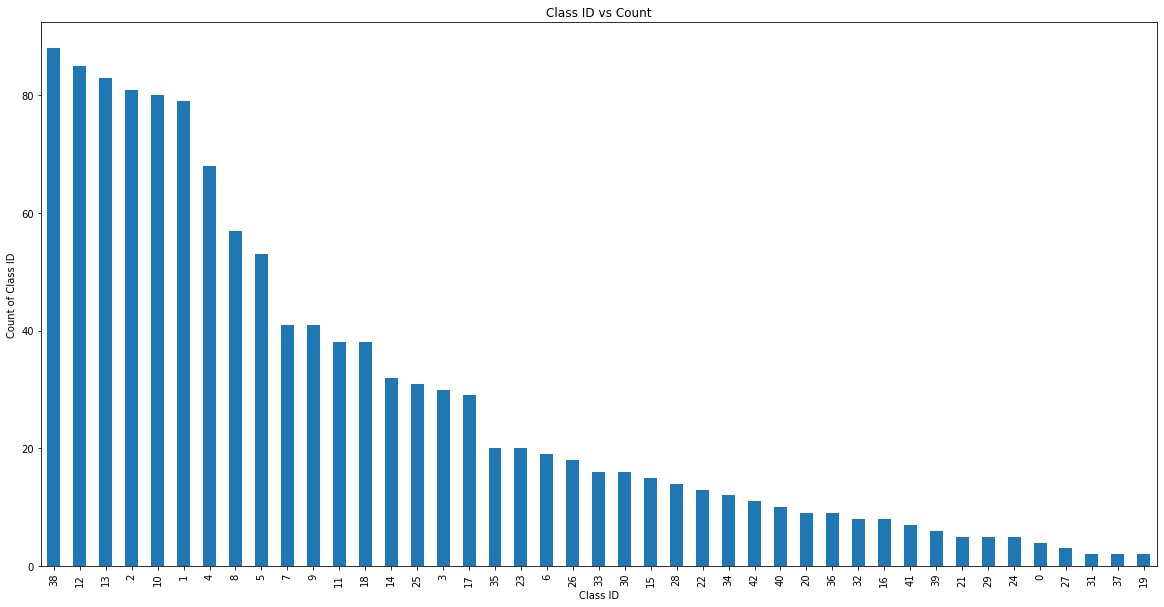

In [23]:
x.plot(kind = 'bar',figsize = (20,10))
plt.xlabel("Class ID")
plt.ylabel("Count of Class ID")
plt.title("Class ID vs Count")
plt.show()

In [24]:
# The count of id's 10,2,38,12,13,1 and 8 are high in number when compared to other sign id's.
#The sign id's 37,31,19,24 and 27 are least in number.

## Defining lists for categories according to the classes ID's

In [25]:
# Prohibitory category:
# circular Traffic Signs with white background and red border line
prohibitory=[0,1,2,3,4,5,7,8,9,10,15,16]

# Danger category:
# triangular Traffic Signs with white background and red border line
danger=[11,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

# Mandatory category:
# circular Traffic Signs with blue background
mandatory=[33,34,35,36,37,38,39,40]

# Other category:
other=[6,12,13,14,17,32,41,42]

####       YOLO: In YOLO labeling format, a .txt file with the same name is created for each image file in the same directory. 
####       Each .txt file contains the annotations for the corresponding image file, 
####       that is object class, object coordinates, width and height.

## converting data into yolo format

In [26]:
## yolo stores the data into format(center(x),center(y),width,height)
# Adding new empty columns to dataFrame to save numbers for YOLO format
df['CategoryID']=''
df['center x']=''
df['center y']=''
df['width']=''
df['height']=''

In [66]:
df.head()

,ImageID,XMin,YMin,XMax,YMax,ClassID,CategoryID,center x,center y,width,height
0,00000.ppm,774,411,815,446,11,,,,,
1,00001.ppm,983,388,1024,432,40,,,,,
2,00001.ppm,386,494,442,552,38,,,,,
3,00001.ppm,973,335,1031,390,13,,,,,
4,00002.ppm,892,476,1006,592,39,,,,,


In [27]:
# Getting category's ID according to the class's ID
df.loc[df['ClassID'].isin(prohibitory),'CategoryID']=0
df.loc[df['ClassID'].isin(danger),'CategoryID']=1
df.loc[df['ClassID'].isin(mandatory),'CategoryID']=2
df.loc[df['ClassID'].isin(other),'CategoryID']=3

In [28]:
df.head()

,ImageID,XMin,YMin,XMax,YMax,ClassID,CategoryID,center x,center y,width,height
0,00000.ppm,774,411,815,446,11,1,,,,
1,00001.ppm,983,388,1024,432,40,2,,,,
2,00001.ppm,386,494,442,552,38,2,,,,
3,00001.ppm,973,335,1031,390,13,3,,,,
4,00002.ppm,892,476,1006,592,39,2,,,,


In [29]:
y=df['CategoryID'].value_counts()
y

0    557
3    274
1    219
2    163
Name: CategoryID, dtype: int64

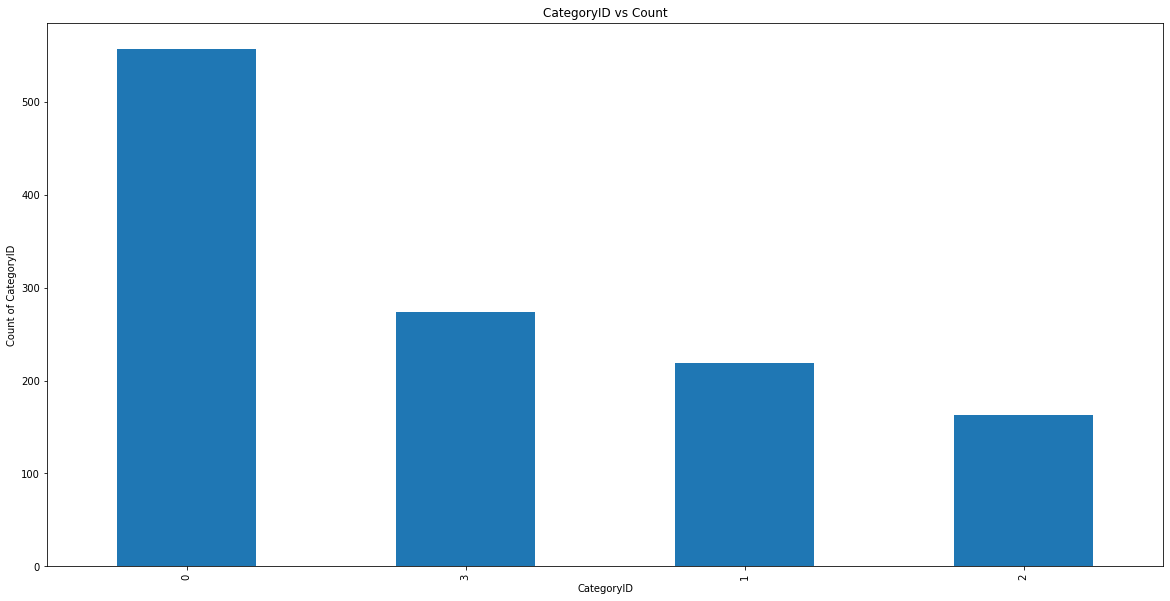

In [56]:
y.plot(kind = 'bar',figsize = (20,10))
plt.xlabel("CategoryID")
plt.ylabel("Count of CategoryID")
plt.title("CategoryID vs Count")
plt.show()

In [57]:
# Calculating bounding box's center in x and y for all rows and saving the result in center colums
# Here center coordinates width and height data is not normalized
df['center x']=(df['XMax']+df['XMin'])/2
df['center y']=(df['YMax']+df['YMin'])/2

In [58]:
df.head()

,ImageID,XMin,YMin,XMax,YMax,ClassID,CategoryID,center x,center y,width,height
0,00000.ppm,774,411,815,446,11,1,794.5,428.5,,
1,00001.ppm,983,388,1024,432,40,2,1003.5,410.0,,
2,00001.ppm,386,494,442,552,38,2,414.0,523.0,,
3,00001.ppm,973,335,1031,390,13,3,1002.0,362.5,,
4,00002.ppm,892,476,1006,592,39,2,949.0,534.0,,


In [59]:
# Calculating bounding box's width and height for all rows Saving results to width and height columns
df['width']=df['XMax']-df['XMin']
df['height']=df['YMax']-df['YMin']

In [60]:
df.head()

,ImageID,XMin,YMin,XMax,YMax,ClassID,CategoryID,center x,center y,width,height
0,00000.ppm,774,411,815,446,11,1,794.5,428.5,41,35
1,00001.ppm,983,388,1024,432,40,2,1003.5,410.0,41,44
2,00001.ppm,386,494,442,552,38,2,414.0,523.0,56,58
3,00001.ppm,973,335,1031,390,13,3,1002.0,362.5,58,55
4,00002.ppm,892,476,1006,592,39,2,949.0,534.0,114,116


In [61]:
# creating the dataframe with required columns
r= df.loc[:,['ImageID','CategoryID','center x','center y','width','height']].copy()

In [62]:
r.head()

,ImageID,CategoryID,center x,center y,width,height
0,00000.ppm,1,794.5,428.5,41,35
1,00001.ppm,2,1003.5,410.0,41,44
2,00001.ppm,2,414.0,523.0,56,58
3,00001.ppm,3,1002.0,362.5,58,55
4,00002.ppm,2,949.0,534.0,114,116


#### Normalizing the center,width and height in the yolo format
#### Saving the images in jpg format

In [33]:
# Changing the current working directory where the images are located
os.chdir(path)
os.getcwd()

'C:\\Users\\GAURAV\\Desktop\\maindata'

In [ ]:
# Don't run
for x in os.listdir(path):
    if(x.endswith(".ppm")):
        ppmimg=cv.imread(x)
        
        # Getting the image width and height
        h,w=ppmimg.shape[:2]
        # Getting the image name without extension
        imgname=x[:-4]
        # Creating the dataframe that has only matching row with file name
        newdf=r.loc[r['ImageID']==x].copy()
        
        # Normalizing the data into yolo format
        newdf['center x']=newdf['center x']/w
        newdf['center y']=newdf['center y']/h
        newdf['width']=newdf['width']/w
        newdf['height']=newdf['height']/h
        
        # Creating the final dataframe having required columns
        
        result= newdf.loc[:,['CategoryID','center x','center y','width','height']].copy()
        
        # Checking the annotations for the current image and if annotations not found then skip the current image
        if result.isnull().values.all():
            continue
        
        # setting the path for saving txt file
        newpath="C:/Users/GAURAV/Desktop/finaldata"
        path_to_save=newpath+'/'+imgname+'.txt'
        
        # Saving the dataframe into txt file
        result.to_csv(path_to_save,header=False,index=False,sep=' ')
        
        # setting the path for saving the jpg image
        path_to_save=newpath+'/'+imgname+'.jpg'
        
        # Saving the image at same location where txt file is stored using opencv in jpg format
        cv.imwrite(path_to_save,ppmimg)        

## Creating files required for training on darknet

In [34]:
path=r"\finaldata"

In [37]:
# Using list we will store the path of each image
lst=[]
for img in os.listdir(path):
    if img.endswith(".jpg"):
        imgpath=os.path.join(path,img)
        # During writing to the file it will move the control to the next line
        lst.append(imgpath+'\n')

In [36]:
# Splitting the train and test data
test=lst[:int(len(lst)*0.15)]
train=lst[int(len(lst)*0.15):]

In [ ]:
# Creating the train.txt file
# It will have writing 85% of lines in it
with open(os.path.join(path,'train.txt'),'w') as train_txt:
    for e in train:
        train_txt.write(e)

In [ ]:
# Creating the test.txt file
# It will have writing 15% of lines in it
with open(os.path.join(path,'test.txt'),'w') as test_txt:
    for e in test:
        test_txt.write(e)

In [ ]:
# Setting counter for counting number of classes
c=0
with open(path+'/'+'classes.names','w') as names,open(path+'/'+'classes.txt','r') as txt:
    for line in txt:
        names.write(line)
        c+=1

In [ ]:
with open(path+'/'+'ts_data.data','w') as data:
    data.write('classes ='+str(c)+'\n')
    
    # Location of the train.txt file
    data.write('train='+ os.path.join(path,'train.txt') + '\n')

    # Location of the test.txt file
    data.write('valid='+ os.path.join(path,'test.txt') + '\n')

    # Location of the classes.names file
    data.write('names='+ os.path.join(path,'classes.names')+ '\n')

    # Location for saving weights file
    data.write('backup=backup')

### Training the model using darknet

### 1.On Google colab 

<img src="images/b.png" width="600" height="400">
<img src="images/c.png" width="600" height="400">
<img src="images/d.png" width="600" height="400">
<img src="images/e.png" width="600" height="400">

## Testing the model using Open CV

In [2]:
# creating network containing trained weights and configuration file( Loading yolo network)
net=cv.dnn.readNet('yolov3_custom_last.weights','yolov3_customtest.cfg')

In [3]:
classes=[]
with open('classes.names','r') as f:
    classes=f.read().splitlines()
classes

['prohibitory', 'danger', 'mandatory', 'other']

In [4]:
images_path=glob.glob(r"full_path/*.jpg")

In [5]:
# Getting output layers names
output_layers_names=net.getUnconnectedOutLayersNames()
output_layers_names

['yolo_82', 'yolo_94', 'yolo_106']

In [9]:
# For images
for imgpath in images_path:
    img=cv.imread(imgpath)
    img=cv.resize(img,(1000,600),cv.INTER_AREA)
    height,width,_=img.shape

    # Creating input blob for network
    # img,normalization,size
    # Binary large object
    # preprocessing the image 
    blob = cv.dnn.blobFromImage(img,1/255.0,(416,416),swapRB=True,crop=False)
    # Setting blob as input to the network
    net.setInput(blob)
    # Runs a forward pass to compute the net output
    layers_output=net.forward(output_layers_names)
    
    # Visualizing the result
    class_ids = []
    confidences = []
    boxes = []
    # Extracting information from layers output
    for out in layers_output:
        # Extracting information from each output
        for detection in out:
            # Each detection will consist of 4 box coordinates,p(o),probability of 4 classes
            # Storing classes predictions
            scores=detection[5:]
            # Getting index of the class with the maximum value of probability
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence>0.5:
                center_x=int(detection[0]*width)
                center_y=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)
                
                # Rectangle coordinates
                # Upper left coordinates
                x=int(center_x-w/2)
                y=int(center_y-h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    font=cv.FONT_HERSHEY_PLAIN

    indexes=cv.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label=str(classes[class_ids[i]])
            confidence=str(round(confidences[i],2))
            cv.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
            cv.putText(img,label+" "+confidence,(x-2,y-5),font,1,(51,51,255),2)
    cv.imshow('img',img)
    cv.waitKey(0)
    
cv.destroyAllWindows()

In [8]:
# for video and camera

cap=cv.VideoCapture("full_path/testvideo.mp4")
while True:
    _,img = cap.read()
    img=cv.resize(img,(1000,600),cv.INTER_AREA)
    height,width,_=img.shape
    
    # Creating input blob for network
    # img,normalization,size
    blob = cv.dnn.blobFromImage(img,1/255.0,(416,416),swapRB=True,crop=False)
    # Setting blob as input to the network
    net.setInput(blob)
    #  Runs a forward pass to compute the net output
    layers_output=net.forward(output_layers_names)
    
    # Visualizing the result
    class_ids = []
    confidences = []
    boxes = []
    # Extracting information from layers output
    for out in layers_output:
        # Extracting information from each output
        for detection in out:
            # Each detection will consist of 4 box coordinates,p(o),probability of 4 classes
            # Storing classes predictions
            scores=detection[5:]
            # Getting index of the class with the maximum value of probability
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence>0.5:
                center_x=int(detection[0]*width)
                center_y=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)
                
                # Rectangle coordinates
                # Upper left coordinates
                x=int(center_x-w/2)
                y=int(center_y-h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    font=cv.FONT_HERSHEY_PLAIN
    # With non-max supression
    indexes=cv.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label=str(classes[class_ids[i]])
            confidence=str(round(confidences[i],2))
            cv.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
            cv.putText(img,label+" "+confidence,(x-2,y-5),font,1,(51,51,255),2)
    cv.imshow('img',img)
    key=cv.waitKey(1)
    if key==ord('q'):
        break

cap.release()
cv.destroyAllWindows()